###  Creación del modelo
se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros ( a encontrar) $b$. La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en `numpy.linalg.pinv()`


## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 Se establece un conjunto de datos de precios de viviendas en función de su tamaño.  Los datos sobre el tamaño estarán dados en pies cuadrados y el precio en miles de dólares para un dataset de 200 viviendas. El objetivo será ajustar una línea recta a estos datos para predecir el precio de una vivienda según su tamaño.
 Se ajustara una línea de la forma:

Precio=𝑚⋅Tamaño+𝑐


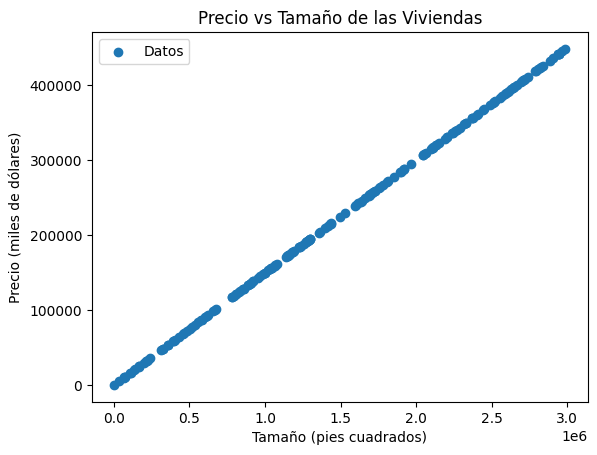

In [2]:
# Semilla para reproducibilidad
np.random.seed(0)

tamaños = np.random.uniform( 3001000,0, 200) ## 200 valores entre 1000 y 3000 pies cuadrados

precio=0.15 * tamaños + 50 + np.random.normal(0, 25, 200) #(en miles de dólares) con una relación lineal y algo de ruido

# Visualizar los datos
plt.scatter(tamaños, precio, label='Datos')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Precio vs Tamaño de las Viviendas')
plt.legend()
plt.show()

In [3]:
tamaños.shape

(200,)

Los parámetros son:  [ 0.15000365 41.72244685]


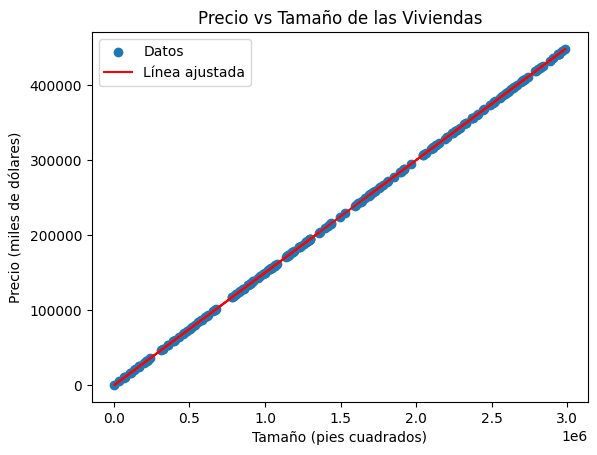

In [5]:
#Ajuste del modelo de regresion Lineal 

#matriz A
A = np.array([tamaños, np.ones(len(tamaños))]).T  #con forma (200,2) # se agrega la columna de Unos para poder multiplicar por x (multiplicacion de matrices)

# vector b
b = precio #forma (200,1)

# Calculo de la pseudo inversa de A
A_pinv = np.linalg.pinv(A)

# Parámetros
parametros_b = A_pinv.dot(b)  # al calcular la pseudo inversa de A y multiplicada por b, se resuelve el sistema de eccuaciones lineales Ax x =b 

# Imprimir los parámetros encontrados
print("Los parámetros son: ", parametros_b)  #serán el coeficiente de la pendiente m y el intercepto de la linea C 


# Dibujar la línea de regresión ajustada
plt.scatter(tamaños, precio, label='Datos')
plt.plot(tamaños, parametros_b[0] * tamaños+ parametros_b[1], color='red', label='Línea ajustada')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Precio vs Tamaño de las Viviendas')
plt.legend()
plt.show()

In [6]:
A.shape

(200, 2)

In [7]:
A

array([[1.35401067e+06, 1.00000000e+00],
       [8.54716712e+05, 1.00000000e+00],
       [1.19210711e+06, 1.00000000e+00],
       [1.36580557e+06, 1.00000000e+00],
       [1.72961195e+06, 1.00000000e+00],
       [1.06267177e+06, 1.00000000e+00],
       [1.68780078e+06, 1.00000000e+00],
       [3.24789225e+05, 1.00000000e+00],
       [1.09048056e+05, 1.00000000e+00],
       [1.85029200e+06, 1.00000000e+00],
       [6.25033161e+05, 1.00000000e+00],
       [1.41378635e+06, 1.00000000e+00],
       [1.29629827e+06, 1.00000000e+00],
       [2.23284488e+05, 1.00000000e+00],
       [2.78782079e+06, 1.00000000e+00],
       [2.73952497e+06, 1.00000000e+00],
       [2.94032459e+06, 1.00000000e+00],
       [5.02307844e+05, 1.00000000e+00],
       [6.65751590e+05, 1.00000000e+00],
       [3.90093543e+05, 1.00000000e+00],
       [6.41663550e+04, 1.00000000e+00],
       [6.02725149e+05, 1.00000000e+00],
       [1.61610043e+06, 1.00000000e+00],
       [6.58631942e+05, 1.00000000e+00],
       [2.646058

In [8]:
parametros_b 


array([ 0.15000365, 41.72244685])

In [9]:
parametros_b.shape

(2,)

## Sección 2: Análisis y  Regresión de un dataset real

In [10]:
import pandas as pd



RUTA = 'C:/Users\jhinn/OneDrive/Desktop/especializacion/Bootcamp inteligencia artificial/Leccion 1 - Conceptos de aprendizaje automatico\Ejercicios clase/dataset_regresion.csv'
df = pd.read_csv(RUTA)
df

,edad_inm,dist_est,nro_tiendas,latitud,longitud,precio_m2_1K
0,32.0,2186.834670,10,24.98298,121.54024,37.9
1,19.5,822.880872,9,24.98034,121.53951,42.2
2,13.3,561.984500,5,24.98746,121.54391,47.3
3,13.3,561.984500,5,24.98746,121.54391,54.8
4,5.0,1667.026714,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,2725.684379,0,24.94155,121.50381,15.4
410,5.6,1513.811048,9,24.97433,121.54310,50.0
411,18.8,1922.792529,7,24.97923,121.53986,40.6
412,8.1,1052.074479,5,24.96674,121.54067,52.5


In [11]:
df.describe().loc[['min','max']]

# se puede ver que los datos requieren ser escalados 

,edad_inm,dist_est,nro_tiendas,latitud,longitud,precio_m2_1K
min,0.0,506.114400,0.0,24.93207,121.47353,7.6
max,43.8,2989.046544,10.0,25.01459,121.56627,78.3


In [12]:
X = df.iloc[:,0:5].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

# Partición 1: entrenamiento (80%) y resto (20%)
x_tr, x_resto, y_tr, y_resto = train_test_split(X, Y,
                                                test_size=0.2,
                                                random_state=23)

# Partición 2: validación (10%) y prueba (10%)
x_vl, x_ts, y_vl, y_ts = train_test_split(x_resto, y_resto,
                                          test_size=0.5, random_state=12)

print(x_tr.shape, y_tr.shape)
print(x_vl.shape, y_vl.shape)
print(x_ts.shape, y_ts.shape)

(331, 5) (331,)
(41, 5) (41,)
(42, 5) (42,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()   


x_tr_s = x_scaler.fit_transform(x_tr)

# Algunas características del escalador
print('Características del escalador ajustado:')
print(x_scaler.data_min_, x_scaler.data_max_)


print('Resultado del escalamiento sobre "x_tr":')
print(f'  Mínimos: {x_tr_s.min(axis=0)}')
print(f'  Máximos: {x_tr_s.max(axis=0)}')

Características del escalador ajustado:
[  0.      506.1144    0.       24.93207 121.47353] [  43.8        2989.04654408   10.           25.01459     121.56627   ]
Resultado del escalamiento sobre "x_tr":
  Mínimos: [0. 0. 0. 0. 0.]
  Máximos: [1. 1. 1. 1. 1.]


In [16]:
print(y_tr.shape)
y_tr = y_tr.reshape(-1,1)
print(y_tr.shape)

(331,)
(331, 1)


In [17]:
y_scaler = MinMaxScaler()
y_tr_s = y_scaler.fit_transform(y_tr)

print('Características del escalador ajustado:')
print(y_scaler.data_min_, y_scaler.data_max_)

print('Resultado del escalamiento sobre "y_tr":')
print(f'  Mínimos: {y_tr_s.min()}')
print(f'  Máximos: {y_tr_s.max()}')

Características del escalador ajustado:
[7.6] [78.3]
Resultado del escalamiento sobre "y_tr":
  Mínimos: 0.0
  Máximos: 1.0


In [18]:
x_vl_s = x_scaler.transform(x_vl)
x_ts_s = x_scaler.transform(x_ts)

In [19]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(x_tr_s, y_tr_s)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [[-0.15929686  0.01375726  0.23747193  0.43165114  0.28163473]], el intersecto (A) es [0.01377628]


In [21]:
# Predicciones con los sets de validación y prueba
y_vl_pred_s = regressor.predict(x_vl_s)
y_ts_pred_s = regressor.predict(x_ts_s)

print(y_vl_pred_s.min(), y_vl_pred_s.max())
print(y_ts_pred_s.min(), y_ts_pred_s.max())

0.05898516024078035 0.6698053503819943
0.0818983449125684 0.6218937869913052


In [22]:
y_vl_pred = y_scaler.inverse_transform(y_vl_pred_s)
y_ts_pred = y_scaler.inverse_transform(y_ts_pred_s)

print(y_vl_pred.min(), y_vl_pred.max())
print(y_ts_pred.min(), y_ts_pred.max())

11.77025082902317 54.955238272006994
13.390212985318586 51.56789074028528


In [25]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error:",mean_squared_error(y_ts, y_ts_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_ts, y_ts_pred)))

Mean Squared Error: 62.34112632716526
Root Mean Squared Error: 7.895639703479716


In [27]:
r2=r2_score(y_ts,y_ts_pred)
r2

0.5038136238955483